# Neutron spectra

We simulated a 1 x 1 x 11 cm<sup>3</sup> parallelepiped, with a 1MeV neutron cource directed along 0 0 1 positioned at 0 0 -1. This geometry as cut by 10 planes from 0 to 9 cm, on each plane the neutron spectra was accumulated through the tally:

```
F2:n 10 11 12 13 14 15 16 17 18 19
e2 1e-10 99log 10
```

This tally was extracted from **mcnp.inpm** by using **TallyRead.py** script. This generated the file [mOut/f2](mOut/f2) which contains the data that we are going to plot.

In [9]:
# let us import the libraries to read and plot the tally output
import numpy as np              # data manipulation library
import matplotlib.pyplot as plt  # data plotting library

# things to make the plot prettier...
import matplotlib as mpl
mpl.rcParams['axes.titlesize']   = 22
mpl.rcParams['axes.labelsize']   = 22
mpl.rcParams['lines.linewidth']  =  3
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize']  = 22
mpl.rcParams['ytick.labelsize']  = 22
mpl.rcParams['legend.fontsize']  = 24

In [10]:
# import data into a matrix
matrix = np.loadtxt("mOut/f2")

# crete an array where each column is the result of the tally on one surface
# we have 10 surfaces (0,9). In matrix the first column is the value of the surface
# so we generate an array with 10 empty fields
surfaces = [[] for i in range(10)]

# lets read the matrix into the surface
for i in range(10):
    surfaces[i] = matrix[matrix[:,0]==i]

NameError: name 'spectra' is not defined

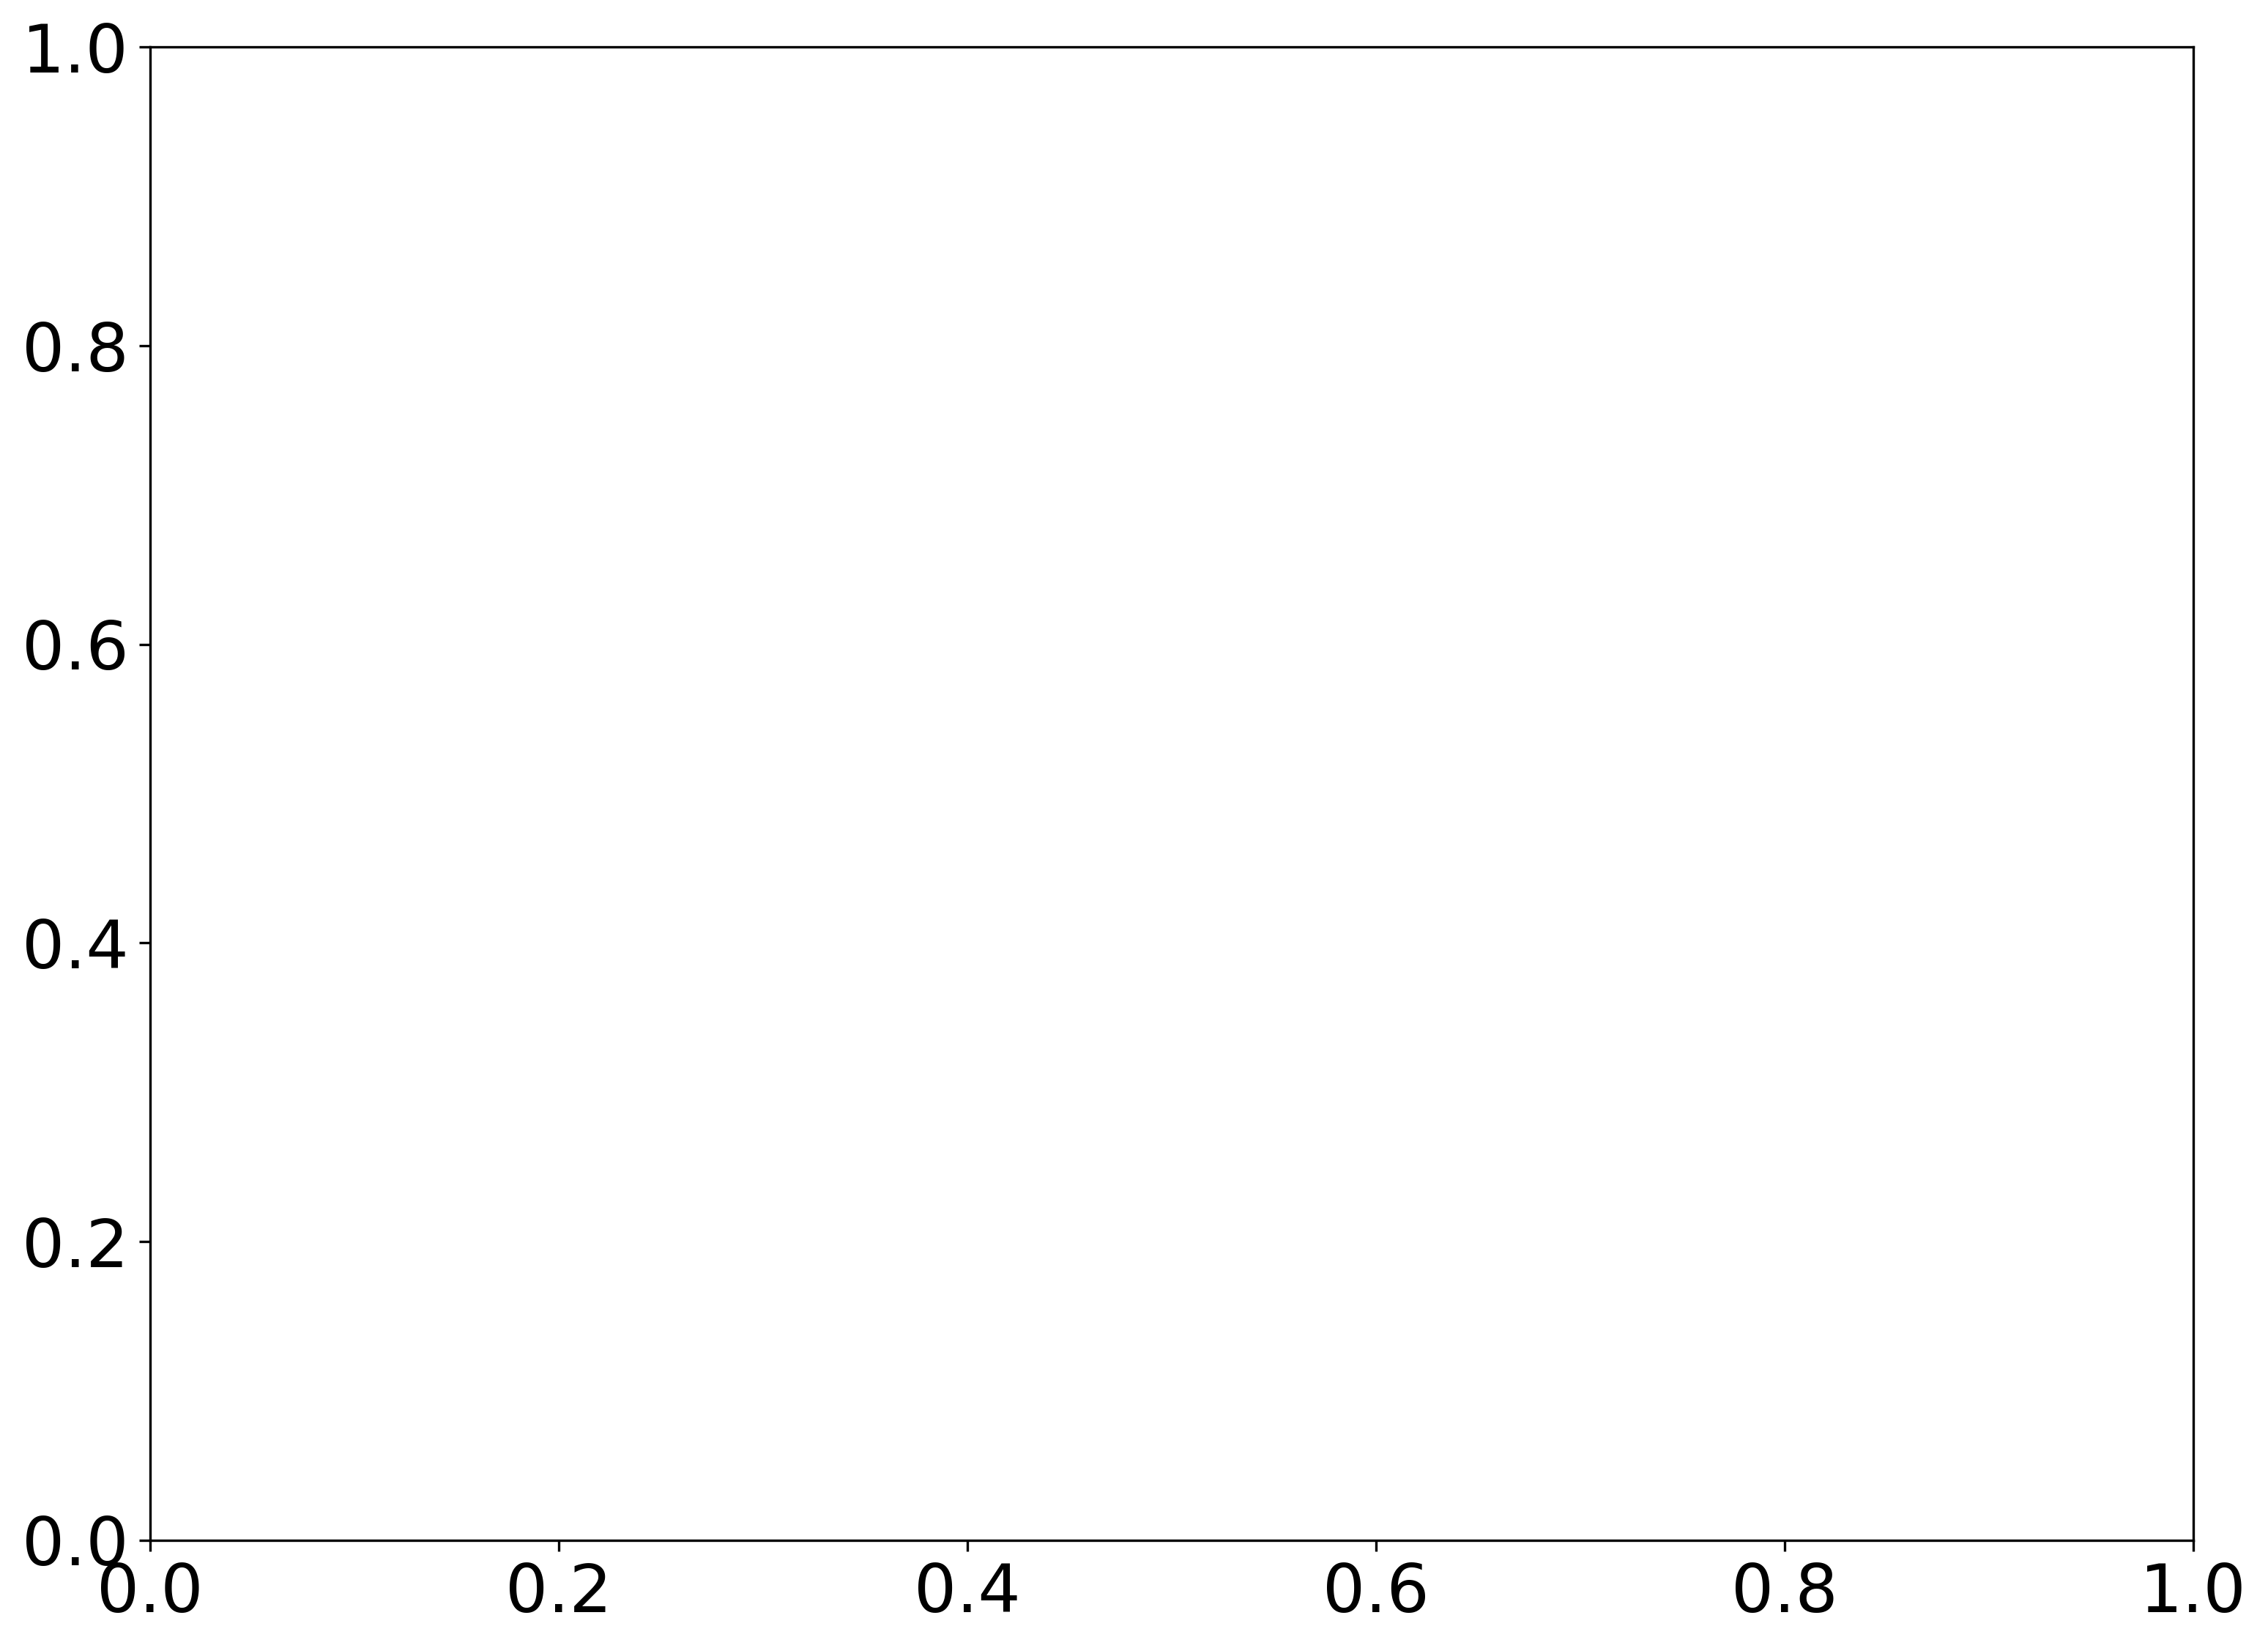

In [11]:
# create the plotting window with pubblication standards
plt.subplots(1,1,figsize=(12, 9), dpi=300)

# load neutron spectra into matlotlib
for surface in surfaces:
    # import data with errors
    plt.errorbar(surface[:,3],surface[:,4],yerr=surface[:,5], label="%i cm"%(surface[0,1]))
    # set scale of the axis
    plt.xscale("log")
    plt.yscale("log")
    # set y range
    plt.xlim((1e-11,10))
    # set x range
    # plt.ylim((5e5,3e8))

plt.xlabel("Neutron Energy (MeV)")
plt.ylabel("Neutron Flux (cm$^{-2}$ s$^{-1}$)")
plt.legend(loc="center left")
plt.show()